# Import and Setup

Adjust cell width to view more content

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

Import general packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import datetime
from matplotlib.patches import Rectangle

Import YLXPS-related packages

In [3]:
import sys 
sys.path.insert(0, '/gpfs/loomis/project/david_moore/aj487/purity_monitor/')
sys.path.insert(0, '/gpfs/loomis/project/david_moore/aj487/purity_monitor/analysis/')
import StandMonitor
import WaveformClass as Wvf
import HelperClasses as HelpC
import RunAnalysis as An
import PlotFunctions as Plt

# Data Read-In

In [4]:
class Namespace:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

# Analysis

In [5]:
FilePath = '/project/fas/david_moore/zl423/PurityData/20200910/'
Files = sorted(glob.glob(FilePath+'GAr_Au*10cm*'))
arg = Namespace(filepath=Files, dirpath=None, txt=False, show=True)
for ii,File in enumerate(Files): 
    print(ii, File)

0 /project/fas/david_moore/zl423/PurityData/20200910/GAr_Au-Thorslabs_10cm_C-500V_A-500V_1.h5
1 /project/fas/david_moore/zl423/PurityData/20200910/GAr_Au-Thorslabs_10cm_C-500V_A-500V_2.h5
2 /project/fas/david_moore/zl423/PurityData/20200910/GAr_Au-Thorslabs_10cm_C-500V_A-500V_3.h5


## Argon Measurement
Argon was left in the chamber since September 4. See Jupyter notebook from 20200904 for comparison. 

In [6]:
ch1 = Wvf.WFM(ID=1, Pol=1)
ch2 = Wvf.WFM(ID=2, Pol=-1)
channels = [ch1, ch2]

FileNames, Method = An.ChooseFilesToAnalyze(arg)
for File in FileNames: 
    An.ImportDataFromHDF5(File, channels)

An.DoAnalysis(channels)

ChargeCollection = ch1.Max / ch2.Max
DiffMinute = int((np.max(ch1.TimeStamp) - np.min(ch1.TimeStamp)).seconds/60.0 + 0.5)
XTicks = int((DiffMinute/12.0 + 0.5))+1
print(np.mean(ChargeCollection))
print(np.std(ChargeCollection)/np.sqrt(len(ChargeCollection)))

 | Filename... /project/fas/david_moore/zl423/PurityData/20200910/GAr_Au-Thorslabs_10cm_C-500V_A-500V_1.h5
 | Number of files in ch1...	 293/293
 | Number of files in ch2...	 293/293
 | Filename... /project/fas/david_moore/zl423/PurityData/20200910/GAr_Au-Thorslabs_10cm_C-500V_A-500V_2.h5
 | Number of files in ch1...	 44/337
 | Number of files in ch2...	 44/337
 | Filename... /project/fas/david_moore/zl423/PurityData/20200910/GAr_Au-Thorslabs_10cm_C-500V_A-500V_3.h5
 | Number of files in ch1...	 75/412
 | Number of files in ch2...	 75/412
 | Processing data in channel 1...
 | Processing data in channel 2...
 | Time elapsed:  11.02900123 sec
1.030545674346561
0.002151066670847336


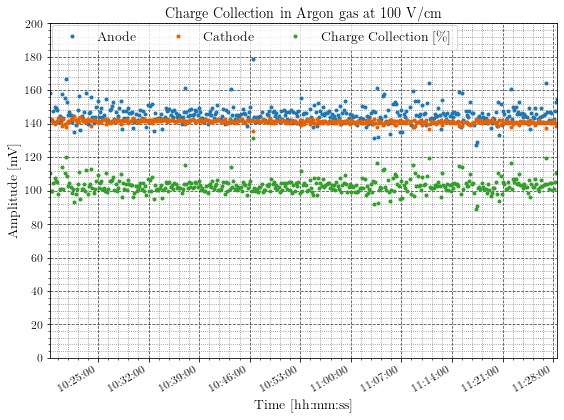

In [7]:
Plt.PltTime(Time=ch1.TimeStamp,
            Data=[ch1.Max,ch2.Max,ChargeCollection*100],
            Legend=['Anode','Cathode','Charge Collection [\%]'],
            Label='Amplitude [mV]',
            XTicks=XTicks,
            YTicks=20,
            YRange=[0,200],
            SaveName='amp_ratio',
            Title='Charge Collection in Argon gas at 100 V/cm',
            Save=False)
# plt.savefig('amp.pdf', bbox_inches='tight')

In [8]:
avg = np.mean(ChargeCollection)
err = np.std(ChargeCollection)/np.sqrt(len(ChargeCollection))

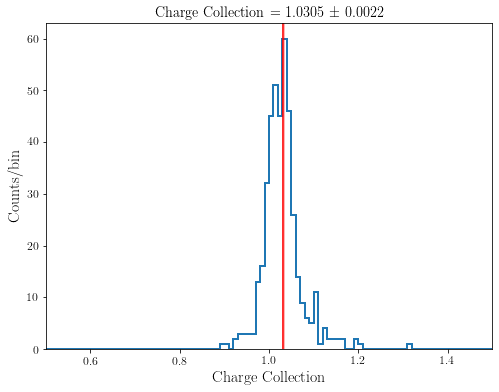

In [9]:
fig = plt.figure(figsize=(8,6))
plt.xlim(0.5,1.5)
plt.hist(ChargeCollection, bins=np.linspace(0.5,1.5,101), histtype='step', align='mid', lw=2)
plt.xlabel('Charge Collection', fontsize=16)
plt.ylabel('Counts/bin', fontsize=16)
plt.axvline(avg, color='red')
plt.title('Charge Collection = %.4f ± %.4f' % (avg,err))
rectangle = plt.Rectangle((avg-err,0), 2*err, 100, fc='red',ec="red", alpha=0.2, fill=True)
plt.gca().add_patch(rectangle)
plt.savefig('chargecollection_hist.pdf',bbox_inches='tight')

In [10]:
FilePath = '/project/fas/david_moore/zl423/PurityData/20200910/'
Files2 = sorted(glob.glob(FilePath+'Vacuum*InnerChamber*'))
arg2 = Namespace(filepath=Files2, dirpath=None, txt=False, show=True)
for ii,File in enumerate(Files2): 
    print(ii, File)
    
ch3 = Wvf.WFM(ID=1, Pol=1)
ch4 = Wvf.WFM(ID=2, Pol=-1)
channels2 = [ch3, ch4]

FileNames2, Method = An.ChooseFilesToAnalyze(arg2)
for File in FileNames2: 
    An.ImportDataFromHDF5(File, channels2)

An.DoAnalysis(channels2)

ChargeCollection2 = ch3.Max / ch4.Max
DiffMinute2 = int((np.max(ch3.TimeStamp) - np.min(ch3.TimeStamp)).seconds/60.0 + 0.5)
XTicks2 = int((DiffMinute2/12.0 + 0.5))+1
print(np.mean(ChargeCollection2))
print(np.std(ChargeCollection2)/np.sqrt(len(ChargeCollection2)))

0 /project/fas/david_moore/zl423/PurityData/20200910/Vacuum_ClosedInnerChamber_Au-Thorslabs_10cm_C-100V_A-100V_1.h5
1 /project/fas/david_moore/zl423/PurityData/20200910/Vacuum_ClosedInnerChamber_Au-Thorslabs_10cm_C-100V_A-100V_2.h5
2 /project/fas/david_moore/zl423/PurityData/20200910/Vacuum_ClosedInnerChamber_Au-Thorslabs_10cm_C-100V_A-100V_3.h5
3 /project/fas/david_moore/zl423/PurityData/20200910/Vacuum_ClosedInnerChamber_Au-Thorslabs_10cm_C-100V_A-100V_4.h5
4 /project/fas/david_moore/zl423/PurityData/20200910/Vacuum_ClosedInnerChamber_Au-Thorslabs_10cm_C-100V_A-100V_5.h5
5 /project/fas/david_moore/zl423/PurityData/20200910/Vacuum_ClosedInnerChamber_Au-Thorslabs_10cm_C-100V_A-100V_6.h5
6 /project/fas/david_moore/zl423/PurityData/20200910/Vacuum_ClosedInnerChamber_Au-Thorslabs_10cm_C-500V_A-500V_1.h5
7 /project/fas/david_moore/zl423/PurityData/20200910/Vacuum_ClosedInnerChamber_Au-Thorslabs_10cm_C-500V_A-500V_2.h5
8 /project/fas/david_moore/zl423/PurityData/20200910/Vacuum_ClosedInnerC

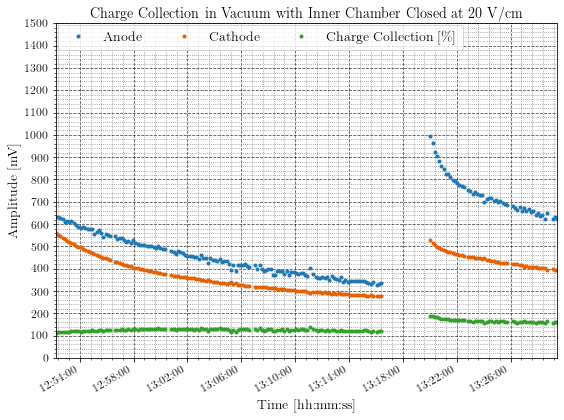

In [11]:
Plt.PltTime(Time=ch3.TimeStamp,
            Data=[ch3.Max,ch4.Max,ChargeCollection2*100],
            Legend=['Anode','Cathode','Charge Collection [\%]'],
            Label='Amplitude [mV]',
            XTicks=XTicks2,
            YTicks=100,
            YRange=[0,1500],
            SaveName='amp_ratio',
            Title='Charge Collection in Vacuum with Inner Chamber Closed at 20 V/cm',
            Save=False)
# plt.savefig('amp.pdf', bbox_inches='tight')

1.3599703301799049


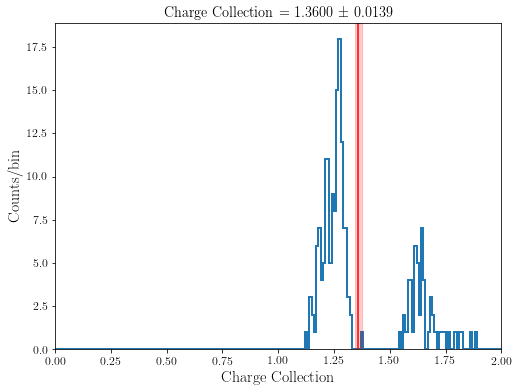

In [43]:
avg2 = np.mean(ChargeCollection2)
err2 = np.std(ChargeCollection2)/np.sqrt(len(ChargeCollection2))

print(avg2)
fig = plt.figure(figsize=(8,6))
plt.xlim(0.0,2.0)
plt.hist(ChargeCollection2, bins=np.linspace(0.0,2.0,201), histtype='step', align='mid', lw=2)
plt.xlabel('Charge Collection', fontsize=16)
plt.ylabel('Counts/bin', fontsize=16)
plt.axvline(avg2, color='red')
plt.title('Charge Collection = %.4f ± %.4f' % (avg2,err2))
rectangle = plt.Rectangle((avg2-err2,0), 2*err2, 10000, fc='red',ec="red", alpha=0.2, fill=True)
plt.gca().add_patch(rectangle)
plt.savefig('chargecollection_hist.pdf',bbox_inches='tight')

In [ ]:
FilePath = '/project/fas/david_moore/zl423/PurityData/20200910/'
Files3 = sorted(glob.glob(FilePath+'GAr*ClosedInnerChamber*'))
arg3 = Namespace(filepath=Files3, dirpath=None, txt=False, show=True)
for ii,File in enumerate(Files3): 
    print(ii, File)
    
ch5 = Wvf.WFM(ID=1, Pol=1)
ch6 = Wvf.WFM(ID=2, Pol=-1)
channels3 = [ch5, ch6]

FileNames3, Method = An.ChooseFilesToAnalyze(arg3)
for File in FileNames3: 
    An.ImportDataFromHDF5(File, channels3)

An.DoAnalysis(channels3)

ChargeCollection3 = ch5.Max / ch6.Max
DiffMinute3 = int((np.max(ch5.TimeStamp) - np.min(ch5.TimeStamp)).seconds/60.0 + 0.5)
XTicks3 = int((DiffMinute3/12.0 + 0.5))+1
print(np.mean(ChargeCollection3))
print(np.std(ChargeCollection3)/np.sqrt(len(ChargeCollection3)))

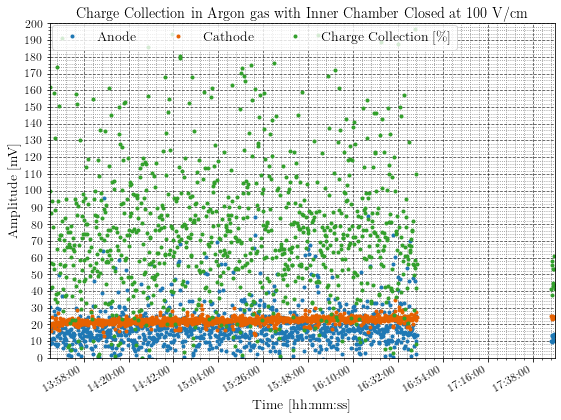

In [14]:
Plt.PltTime(Time=ch5.TimeStamp,
            Data=[ch5.Max,ch6.Max,ChargeCollection3*100],
            Legend=['Anode','Cathode','Charge Collection [\%]'],
            Label='Amplitude [mV]',
            XTicks=XTicks3,
            YTicks=10,
            YRange=[0,200],
            SaveName='amp_ratio',
            Title='Charge Collection in Argon gas with Inner Chamber Closed at 100 V/cm',
            Save=False)
# plt.savefig('amp.pdf', bbox_inches='tight')

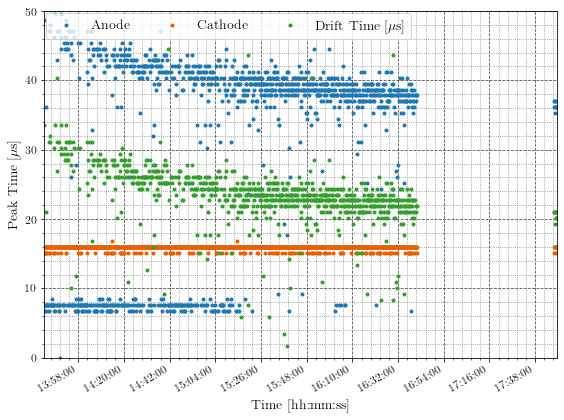

In [15]:
Plt.PltTime(Time=ch5.TimeStamp,
        Data=[ch5.GradTime,ch6.GradTime,ch5.GradTime - ch6.GradTime],
        Legend=['Anode','Cathode','Drift Time [$\mu$s]'],
        Label='Peak Time [$\mu$s]',
        XTicks=XTicks3,
        YTicks=10,
        YRange=[0,50],
        SaveName='drift_time',
        Save=False)

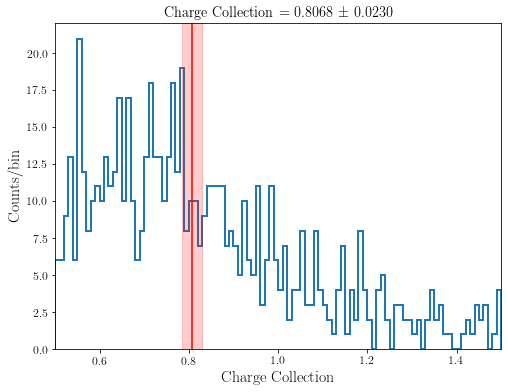

In [16]:
avg3 = np.mean(ChargeCollection3)
err3 = np.std(ChargeCollection3)/np.sqrt(len(ChargeCollection3))

fig = plt.figure(figsize=(8,6))
plt.xlim(0.5,1.5)
plt.hist(ChargeCollection3, bins=np.linspace(0.5,1.5,101), histtype='step', align='mid', lw=2)
plt.xlabel('Charge Collection', fontsize=16)
plt.ylabel('Counts/bin', fontsize=16)
plt.axvline(avg3, color='red')
plt.title('Charge Collection = %.4f ± %.4f' % (avg3,err3))
rectangle = plt.Rectangle((avg3-err3,0), 2*err3, 10000, fc='red',ec="red", alpha=0.2, fill=True)
plt.gca().add_patch(rectangle)
plt.savefig('chargecollection_hist.pdf',bbox_inches='tight')

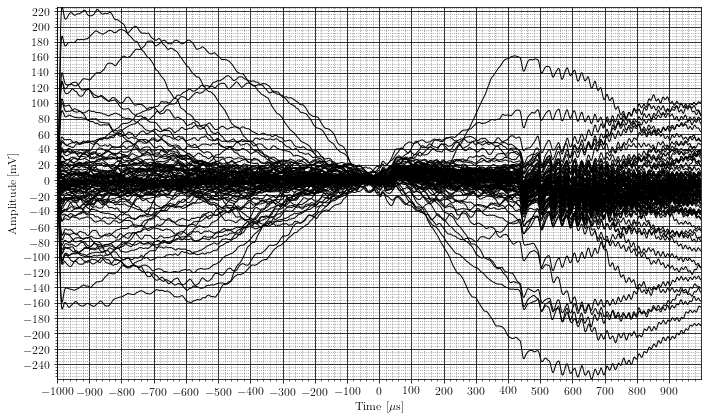

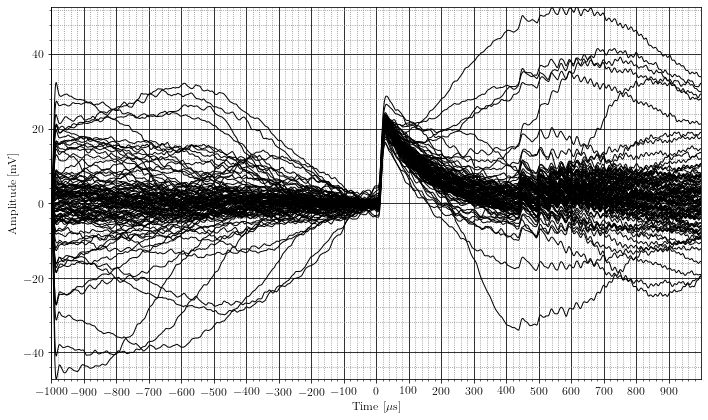

In [24]:
Plt.PltWfm(Time=ch5.Time,
           Data=list(ch5.AmpClean[:100]),
           Legend=['Anode'],
           XTicks=100,
           YTicks=20,
           SaveName='avg_waveform',
           Color='k')

Plt.PltWfm(Time=ch6.Time,
           Data=list(ch6.AmpClean[:100]),
           Legend=['Cathode'],
           XTicks=100,
           YTicks=20,
           SaveName='avg_waveform',
           Color='k')

In [96]:
FilePath = '/project/fas/david_moore/zl423/PurityData/20200910/'
Files4 = sorted(glob.glob(FilePath+'GAr*BetterNoise*'))
arg4 = Namespace(filepath=Files4, dirpath=None, txt=False, show=True)
for ii,File in enumerate(Files4): 
    print(ii, File)
    
ch7 = Wvf.WFM(ID=1, Pol=1)
ch8 = Wvf.WFM(ID=2, Pol=-1)
channels4 = [ch7, ch8]

FileNames4, Method = An.ChooseFilesToAnalyze(arg4)
for File in FileNames4: 
    An.ImportDataFromHDF5(File, channels4)

An.DoAnalysis(channels4)

ChargeCollection4 = ch7.Max / ch8.Max
DiffMinute4 = int((np.max(ch7.TimeStamp) - np.min(ch7.TimeStamp)).seconds/60.0 + 0.5)
XTicks4 = int((DiffMinute4/12.0 + 0.5))+1
print(np.mean(ChargeCollection4))
print(np.std(ChargeCollection4)/np.sqrt(len(ChargeCollection4)))

0 /project/fas/david_moore/zl423/PurityData/20200910/GAr_InnerChamberClosed_BetterNoise_Au-Thorslabs_10cm_C-500V_A-500V_1.h5
1 /project/fas/david_moore/zl423/PurityData/20200910/GAr_InnerChamberClosed_BetterNoise_Au-Thorslabs_10cm_C-500V_A-500V_2.h5
2 /project/fas/david_moore/zl423/PurityData/20200910/GAr_InnerChamberClosed_BetterNoise_Au-Thorslabs_10cm_C-500V_A-500V_3.h5
3 /project/fas/david_moore/zl423/PurityData/20200910/GAr_InnerChamberClosed_BetterNoise_Au-Thorslabs_10cm_C-500V_A-500V_4.h5
4 /project/fas/david_moore/zl423/PurityData/20200910/GAr_InnerChamberClosed_BetterNoise_HeaterON_Au-Thorslabs_10cm_C-500V_A-500V_1.h5
5 /project/fas/david_moore/zl423/PurityData/20200910/GAr_InnerChamberClosed_BetterNoise_HeaterON_Au-Thorslabs_10cm_C-500V_A-500V_2.h5
6 /project/fas/david_moore/zl423/PurityData/20200910/GAr_InnerChamberClosed_BetterNoise_HeaterON_Au-Thorslabs_10cm_C-500V_A-500V_3.h5
7 /project/fas/david_moore/zl423/PurityData/20200910/GAr_InnerChamberClosed_BetterNoise_HeaterON_P

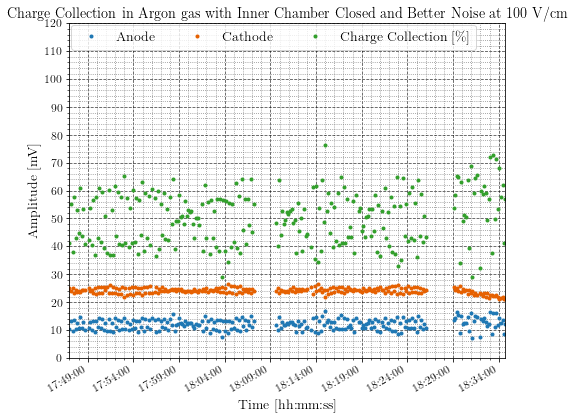

In [97]:
Plt.PltTime(Time=ch7.TimeStamp,
            Data=[ch7.Max,ch8.Max,ChargeCollection4*100],
            Legend=['Anode','Cathode','Charge Collection [\%]'],
            Label='Amplitude [mV]',
            XTicks=XTicks4,
            YTicks=10,
            YRange=[0,120],
            SaveName='amp_ratio',
            Title='Charge Collection in Argon gas with Inner Chamber Closed and Better Noise at 100 V/cm',
            Save=False)
# plt.savefig('amp.pdf', bbox_inches='tight')

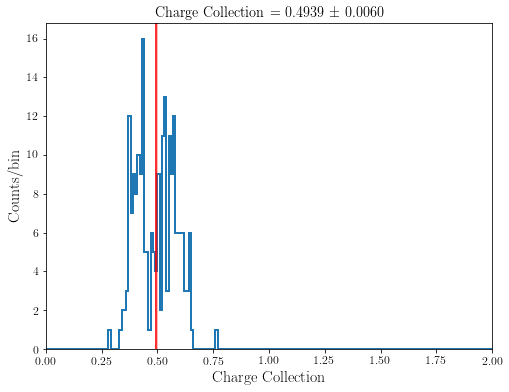

In [89]:
avg4 = np.mean(ChargeCollection4)
err4 = np.std(ChargeCollection4)/np.sqrt(len(ChargeCollection4))

fig = plt.figure(figsize=(8,6))
plt.xlim(0.0,2.0)
plt.hist(ChargeCollection4, bins=np.linspace(0.0,2.0,201), histtype='step', align='mid', lw=2)
plt.xlabel('Charge Collection', fontsize=16)
plt.ylabel('Counts/bin', fontsize=16)
plt.axvline(avg4, color='red')
plt.title('Charge Collection = %.4f ± %.4f' % (avg4,err4))
rectangle = plt.Rectangle((avg4-err4,0), 2*err4, 10000, fc='red',ec="red", alpha=0.2, fill=True)
plt.gca().add_patch(rectangle)
plt.savefig('chargecollection_hist.pdf',bbox_inches='tight')

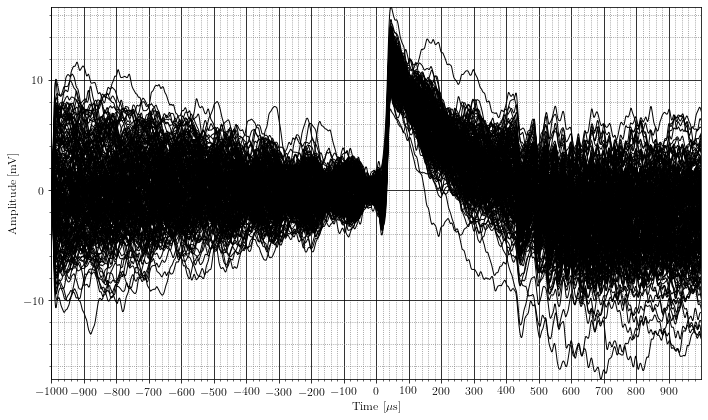

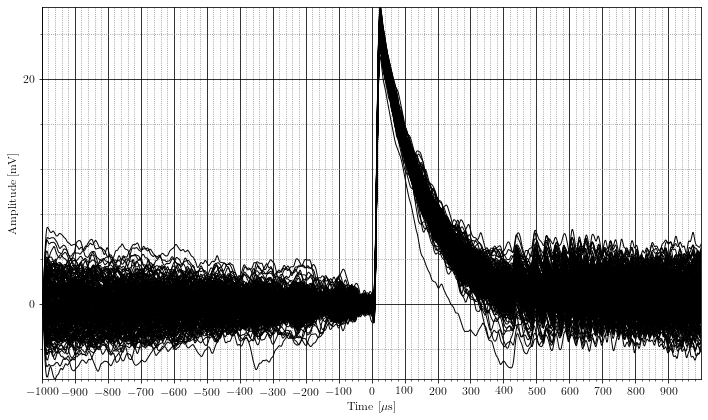

In [90]:
Plt.PltWfm(Time=ch7.Time,
           Data=list(ch7.AmpClean),
           Legend=['Anode'],
           XTicks=100,
           YTicks=10,
           SaveName='avg_waveform',
           Color='k')

Plt.PltWfm(Time=ch8.Time,
           Data=list(ch8.AmpClean),
           Legend=['Cathode'],
           XTicks=100,
           YTicks=20,
           SaveName='avg_waveform',
           Color='k')

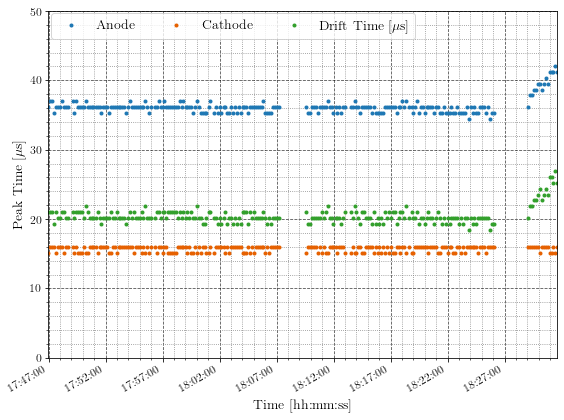

In [95]:
Plt.PltTime(Time=ch7.TimeStamp,
        Data=[ch7.GradTime,ch8.GradTime,ch7.GradTime - ch8.GradTime],
        Legend=['Anode','Cathode','Drift Time [$\mu$s]'],
        Label='Peak Time [$\mu$s]',
        XTicks=XTicks4,
        YTicks=10,
        YRange=[0,50],
        SaveName='drift_time',
        Save=False)

In [92]:
print(r'Drift velocity corresponds to %.2fmm/µs for this 10cm drift length and drift time of %.2fµs ' 
      % (100.0/np.mean(ch7.GradTime - ch8.GradTime), np.mean(ch7.GradTime - ch8.GradTime)))

Drift velocity corresponds to 4.93mm/µs for this 10cm drift length and drift time of 20.28µs 
